In [1]:
import pandas as pd

In [2]:
# scraped data
hkprop = pd.read_csv('group4_hkprop.csv')
hkprop.tail()

,Unnamed: 0,PROPERTIES PAGE,property_name,area,address,sell_price,rent_price,bedrooms,living_rooms,years,efficiency_ratio
913,913,51,Metro City,Tseung Kwan O,Flat A| Middle Floor| Block 05| Phase 1| Metr...,$8.78M,$13.500,3.0,2.0,22.0,75.0
914,914,51,Hing Yip King's Building,Prince Edward Rd,High Floor| Hing Yip King's Building| Prince ...,$18.00M,$13.500,3.0,2.0,54.0,79.0
915,915,51,Wan Chai,Causeway Bay,Flat K| Tower 3| Phase 2| The Avenue| Admiral...,$15.80M,$13.500,1.0,NaN,4.0,NaN
916,916,51,Banyan Garden,Lai Chi Kok,Flat H| Middle Floor| Block 2| Phase I| Banya...,$8.70M,$13.500,2.0,2.0,16.0,70.0
917,917,51,Grand Waterfront,To Kwa Wan,Flat E| Low Floor| Block 2| Grand Waterfront|...,$11.00M,$13.500,NaN,NaN,12.0,72.0


In [3]:
hkprop.columns

Index(['Unnamed: 0', 'PROPERTIES PAGE', 'property_name', 'area', 'address',
       'sell_price', 'rent_price', 'bedrooms', 'living_rooms', 'years',
       'efficiency_ratio'],
      dtype='object')

In [4]:
hkprop.dtypes

Unnamed: 0            int64
PROPERTIES PAGE       int64
property_name        object
area                 object
address              object
sell_price           object
rent_price           object
bedrooms            float64
living_rooms        float64
years               float64
efficiency_ratio    float64
dtype: object

In [5]:
hkprop['sell_price'] = hkprop['sell_price'].str.extract('(\d+\.\d+)')
hkprop['sell_price'] = hkprop['sell_price'].str.replace('.', '')
hkprop['sell_price'] = hkprop['sell_price'].astype(int)

In [6]:
# drop unnecessary columns
hkprop = hkprop.drop(['Unnamed: 0', 'PROPERTIES PAGE'], axis=1)

# scale selling price into million and rename column
hkprop['sell_price'] = hkprop['sell_price'] / 100
hkprop.rename(columns={'sell_price':'sell_price_M'}, inplace=True)
hkprop.head()

,property_name,area,address,sell_price_M,rent_price,bedrooms,living_rooms,years,efficiency_ratio
0,Forfar,Kln Tong / Beacon Hill,Flat B| High Floor| The Forfar| Forfar| Kln T...,50.0,$85.000,4.0,2.0,9.0,75.0
1,King's Park Hill,Homantin/Kingspark,High Floor| Apt 70 ( Blk 4 )| King's Park Hil...,98.0,$138.000,5.0,2.0,19.0,68.0
2,34G Braga Circuit,Kadoorie Hill,34G Braga Circuit| Kadoorie Hill,38.0,$56.000,3.0,2.0,63.0,NaN
3,Beverly Villas,Kln Tong / Beacon Hill,Flat C| Low Floor| Block 04| Beverly Villas| ...,23.8,$56.000,3.0,2.0,38.0,93.0
4,One Mayfair,Kln Tong / Beacon Hill,Block 7| One Mayfair| Kln Tong / Beacon Hill,42.0,$56.000,3.0,1.0,7.0,78.0


In [7]:
hkprop.describe()

,sell_price_M,bedrooms,living_rooms,years,efficiency_ratio
count,918.000000,775.000000,693.000000,905.000000,750.000000
mean,25.454597,2.667097,1.862915,23.166851,77.240000
std,35.643537,1.024324,0.372418,15.594978,6.149538
min,2.480000,1.000000,1.000000,1.000000,40.000000
25%,9.525000,2.000000,2.000000,11.000000,73.000000
50%,15.500000,3.000000,2.000000,19.000000,77.000000
75%,28.000000,3.000000,2.000000,35.000000,80.000000
max,438.000000,13.000000,3.000000,64.000000,97.000000


In [8]:
# sadly with the javascript problem we had only a small volume of data
df = hkprop.dropna()
df.shape

(587, 9)

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


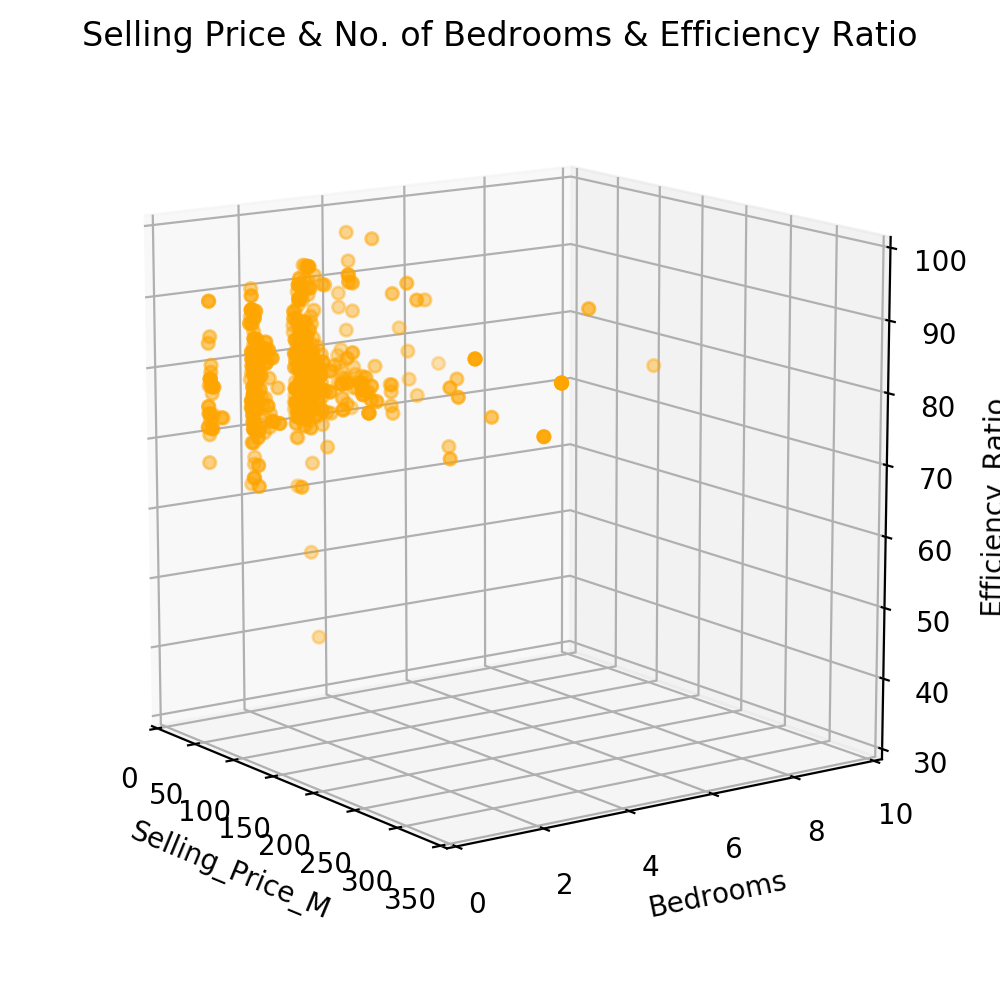

In [12]:
def update_lines(num):
    x = list(df.sell_price_M.values)
    y = list(df.bedrooms.values)
    z = list(df.efficiency_ratio.values)
    graph._offsets3d = (x, y, z)
    return graph

x = [0]
y = [0]
z = [0]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
graph = ax.scatter(x, y, z, color='orange')

ax.set_xlim3d(0, 350)
ax.set_ylim3d(0, 10)
ax.set_zlim3d(30, 100)

plt.suptitle('Selling Price & No. of Bedrooms & Efficiency Ratio')
ax.set_xlabel('Selling_Price_M')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Efficiency_Ratio')

# Creating the Animation object
ani = animation.FuncAnimation(fig, update_lines, frames=200, interval=50, blit=False)
plt.tight_layout()